https://drive.google.com/file/d/1ypX5EkhSijlyX-JvsIBIXOTqZOxe2F6E/view?usp=drive_link

https://drive.google.com/file/d/1_EffTCMyHOlNoMCwn8wIOiU_QwQKK9I_/view?usp=drive_link

In [ ]:
! gdown 1ypX5EkhSijlyX-JvsIBIXOTqZOxe2F6E

Downloading...
From: https://drive.google.com/uc?id=1ypX5EkhSijlyX-JvsIBIXOTqZOxe2F6E
To: /content/train.csv
100% 48.1M/48.1M [00:00<00:00, 75.4MB/s]


In [ ]:
! gdown 1_EffTCMyHOlNoMCwn8wIOiU_QwQKK9I_

Downloading...
From: https://drive.google.com/uc?id=1_EffTCMyHOlNoMCwn8wIOiU_QwQKK9I_
To: /content/test.csv
100% 19.3M/19.3M [00:00<00:00, 100MB/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('dark_background')

In [ ]:
df_test = pd.read_csv("/content/test.csv");

In [ ]:
df_train = pd.read_csv("/content/train.csv");

In [ ]:
df_test.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING


In [ ]:
df_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [ ]:
X_train, y_train = df_train.drop("Activity", axis=1), df_train["Activity"]
X_test, y_test = df_test.drop("Activity", axis=1), df_test["Activity"]

In [ ]:
assert(X_train.shape == (7352, 562) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 562) and y_test.shape == (2947,))

In [ ]:
classes = y_train.unique()
classes

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
y_ = pd.concat([y_train, y_test], ignore_index=True)
y_train = y_train.map(lambda x: dict(zip(classes, [5, 4, 6, 1, 3, 2]))[x])
y_test = y_test.map(lambda x: dict(zip(classes, [5, 4, 6, 1, 3, 2]))[x])
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(0.9)

In [ ]:
X_pca = pca.fit_transform(scaled_X)

In [ ]:
pca.n_components_

66

In [ ]:
pca.explained_variance_ratio_

array([0.50649155, 0.0622838 , 0.0268964 , 0.0244876 , 0.01885617,
       0.01629726, 0.01412271, 0.01218444, 0.00983506, 0.00948124,
       0.00856939, 0.00810397, 0.00764919, 0.00677108, 0.00629627,
       0.00616337, 0.00594854, 0.00576411, 0.00563468, 0.0053988 ,
       0.00520007, 0.00502282, 0.00472558, 0.00464046, 0.00446785,
       0.00440431, 0.00416403, 0.00401624, 0.0038844 , 0.00381432,
       0.00366234, 0.00364018, 0.00349921, 0.00346418, 0.0033523 ,
       0.00329172, 0.0032424 , 0.00300067, 0.00293757, 0.00289972,
       0.00276589, 0.0027084 , 0.00264582, 0.00257782, 0.00254626,
       0.0024815 , 0.00245177, 0.00239882, 0.00237395, 0.00233582,
       0.00227954, 0.00219448, 0.00212744, 0.0021022 , 0.00205584,
       0.00200815, 0.00197996, 0.00194417, 0.00193962, 0.00189253,
       0.00186713, 0.00185313, 0.00181674, 0.00176783, 0.00175029,
       0.00172816])

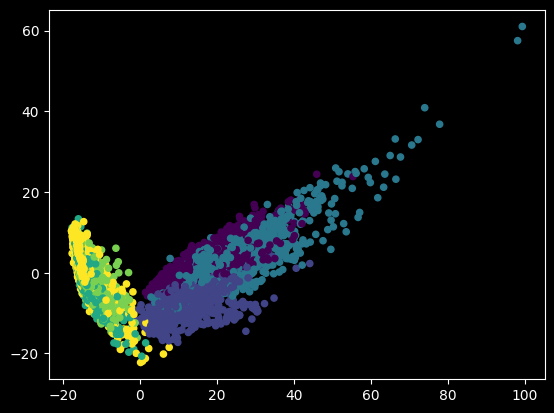

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

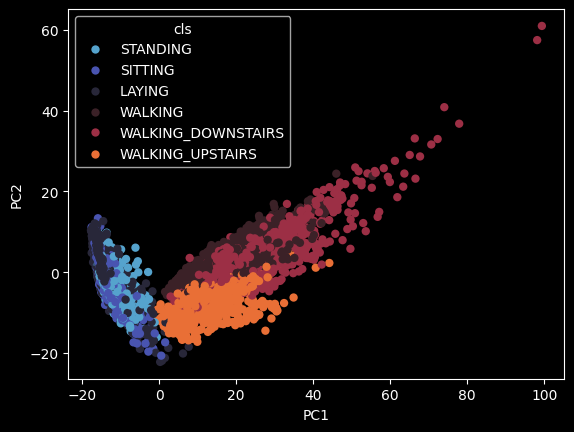

In [ ]:
hue_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
hue_df["cls"] = y_
sns.scatterplot(hue_df, x="PC1", y="PC2", hue="cls", palette="icefire", linewidth=0);

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(6, n_init = 100, random_state = 17)

In [ ]:
km.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

In [ ]:
labels = km.labels_

In [ ]:
hue_df["labels"] = labels

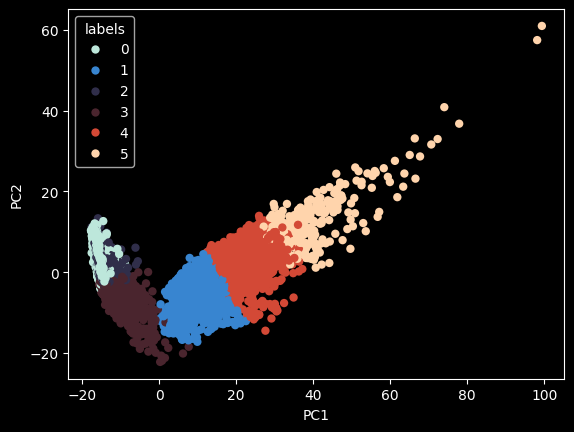

In [ ]:
sns.scatterplot(hue_df, x="PC1", y="PC2", hue="labels", palette="icefire", linewidth=0);

In [ ]:
inertia = []
for i in range(2, 10):
  inertia.append(KMeans(i, n_init = 10, random_state = 17).fit(X_pca).inertia_)

Text(0, 0.5, 'inertia')

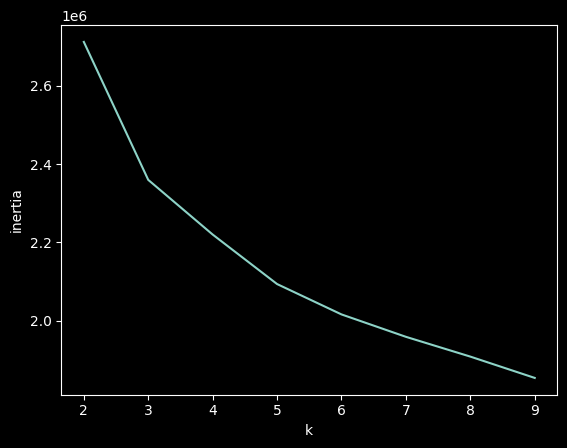

In [ ]:
plt.plot(range(2, 10), inertia)
plt.xlabel("k")
plt.ylabel("inertia")

In [ ]:
data = pd.DataFrame({"labels": labels, "y": y, "val": y})
data = pd.pivot_table(data, columns="labels", index="y", values="val", aggfunc="count", fill_value=0)
data.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 'сидение', 'стояние', 'лежание']
data.columns = ['cluster' + str(i + 1) for i in range(6)]
data

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
ходьба,0,902,0,0,742,78
подъем вверх по лестнице,0,1241,0,2,296,5
спуск по лестнице,0,320,0,0,890,196
сидение,90,1,1236,450,0,0
стояние,0,0,1344,562,0,0
лежание,1557,5,53,329,0,0


In [ ]:
tab = pd.crosstab(y, labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице',
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,902,0,0,742,78,1722
подъем вверх по лестнице,0,1241,0,2,296,5,1544
спуск по лестнице,0,320,0,0,890,196,1406
сидение,90,1,1236,450,0,0,1777
стояние,0,0,1344,562,0,0,1906
лежание,1557,5,53,329,0,0,1944
все,1647,2469,2633,1343,1928,279,10299


In [ ]:
tab["max_cluster_ratio"] = np.max(tab.iloc[:, :-1], axis=1) / tab["все"]
tab = tab.sort_values("max_cluster_ratio", ascending=False)

In [ ]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все,max_cluster_ratio
подъем вверх по лестнице,0,1241,0,2,296,5,1544,0.803756
лежание,1557,5,53,329,0,0,1944,0.800926
стояние,0,0,1344,562,0,0,1906,0.705142
сидение,90,1,1236,450,0,0,1777,0.695554
спуск по лестнице,0,320,0,0,890,196,1406,0.633001
ходьба,0,902,0,0,742,78,1722,0.523810
все,1647,2469,2633,1343,1928,279,10299,0.255656


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
inertia = []
for k in tqdm_notebook(range(1, len(classes) + 1)):
  inertia.append(KMeans(k, n_init = 100, random_state = 17).fit(X_pca).inertia_)

<ipython-input-152-227ca77a8aaa>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, len(classes) + 1)):


  0%|          | 0/6 [00:00<?, ?it/s]

Text(0, 0.5, 'inertia')

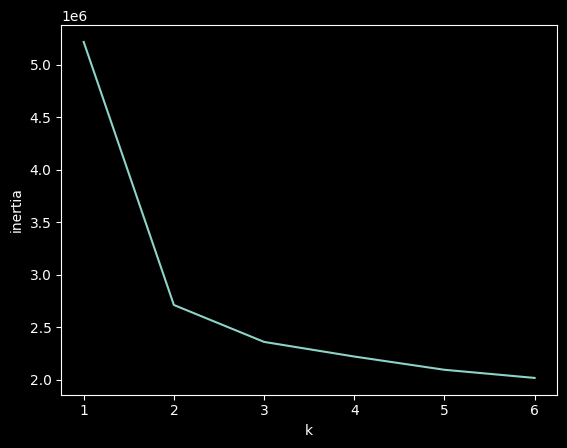

In [ ]:
plt.plot(range(1, len(classes) + 1), inertia)
plt.xlabel("k")
plt.ylabel("inertia")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ag = AgglomerativeClustering(n_clusters=6, linkage="ward")
ag.fit(X_pca)

AgglomerativeClustering(n_clusters=6)

In [ ]:
labels2 = ag.labels_

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
ari1 = adjusted_rand_score(y, labels)
ari2 = adjusted_rand_score(y, labels2)

In [ ]:
ari1

0.41968709998850623

In [ ]:
ari2

0.4881185702762452

In [ ]:
adjusted_rand_score(labels, labels2)

0.6924214703160219

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svd = LinearSVC(random_state=17)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svd, svc_params, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
grid_search.best_params_

{'C': 0.01}

In [ ]:
grid_search.best_score_

0.9333533168469345

In [ ]:
best_svc = grid_search.best_estimator_
y_predicted = best_svc.predict(X_test_scaled)

In [ ]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице',
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,496,0,0,0,0,0,496
подъем вверх по лестнице,17,454,0,0,0,0,471
спуск по лестнице,2,3,415,0,0,0,420
сидение,0,2,0,433,56,0,491
стояние,0,0,0,19,513,0,532
лежание,0,0,0,0,16,521,537
все,515,459,415,452,585,521,2947


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
confusion_matrix(y_test, y_predicted)

array([[496,   0,   0,   0,   0,   0],
       [ 17, 454,   0,   0,   0,   0],
       [  2,   3, 415,   0,   0,   0],
       [  0,   2,   0, 433,  56,   0],
       [  0,   0,   0,  19, 513,   0],
       [  0,   0,   0,   0,  16, 521]])

In [ ]:
precision = precision_score(y_test, y_predicted, average=None)

In [ ]:
recall = recall_score(y_test, y_predicted, average=None)

In [ ]:
recall_precision_df = pd.DataFrame({"recall": recall, "precision": precision}, index=['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице',
             'сидение', 'стояние', 'лежание'])

In [ ]:
recall_precision_df

,recall,precision
ходьба,1.000000,0.963107
подъем вверх по лестнице,0.963907,0.989107
спуск по лестнице,0.988095,1.000000
сидение,0.881874,0.957965
стояние,0.964286,0.876923
лежание,0.970205,1.000000


In [ ]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
svd2 = LinearSVC(random_state=17)
grid_search2 = GridSearchCV(svd2, svc_params, cv=3, n_jobs=-1)
grid_search2.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
grid_search2.best_params_

{'C': 0.1}

In [ ]:
grid_search2.best_score_

0.8936368051912728

In [ ]:
best_svc2 = grid_search2.best_estimator_
y_predicted2 = best_svc2.predict(X_test_pca)

In [ ]:
tab = pd.crosstab(y_test, y_predicted2, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице',
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,482,9,5,0,0,0,496
подъем вверх по лестнице,40,414,16,1,0,0,471
спуск по лестнице,6,23,389,0,1,1,420
сидение,0,2,0,424,65,0,491
стояние,3,0,0,40,488,1,532
лежание,0,0,0,2,0,535,537
все,531,448,410,467,554,537,2947


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_score(y_test, y_predicted)

0.9609772650152698

In [ ]:
accuracy_score(y_test, y_predicted2)

0.9270444519850696

In [ ]:
(grid_search.best_score_ - grid_search2.best_score_) * 100

3.97165116556617